In [88]:
#importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [89]:
#loading data
df = pd.read_csv('C:/Users/TestFix123/OneDrive/Desktop/CUVETTE MACHINE LEARNING/Diabetes.csv')

In [90]:
df

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Outcome
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,NO
764,2,122,70,27,0,36.8,0.340,27,NO
765,5,121,72,23,112,26.2,0.245,30,NO
766,1,126,60,0,0,30.1,0.349,47,YES


In [91]:
# Renaming columns
df = df.rename(columns={
    ' Number of times pregnant': 'Pregnancies',
    ' Plasma glucose concentration': 'Glucose',
    ' Diastolic blood pressure': 'Blood_Pressure',
    ' Triceps skin fold thickness': 'Skin_Thickness',
    ' 2-Hour serum insulin': 'Insulin',
    ' Body mass index': 'BMI',
    ' Diabetes pedigree function': 'Diabetes_Pedigree_Function',
    ' Age (years)': 'Age'
})
df.tail()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,NO
764,2,122,70,27,0,36.8,0.340,27,NO
765,5,121,72,23,112,26.2,0.245,30,NO
766,1,126,60,0,0,30.1,0.349,47,YES
767,1,93,70,31,0,30.4,0.315,23,NO


In [92]:
df.describe()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood_Pressure              768 non-null    int64  
 3   Skin_Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes_Pedigree_Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


# __Data Pre-Processing__

In [94]:
df.isnull().sum()
#no null values or missing data

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64

In [95]:
#check for duplicate values
print(df.duplicated().sum())

0


In [96]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
df['Outcome']=encode.fit_transform(df['Outcome'])
df.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
numerical_columns = df.select_dtypes(include=[np.number]).columns 
numerical_columns

Index(['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_Pedigree_Function', 'Age', 'Outcome'],
      dtype='object')

In [98]:
#checking for outliers
out_df=df[['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_Pedigree_Function', 'Age']]
out_df.head()
out_df.describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
90%,9.000000,167.000000,88.000000,40.000000,210.000000,41.500000,0.878600,51.000000
95%,10.000000,181.000000,90.000000,44.000000,293.000000,44.395000,1.132850,58.000000
99%,13.000000,196.000000,106.000000,51.330000,519.900000,50.759000,1.698330,67.000000


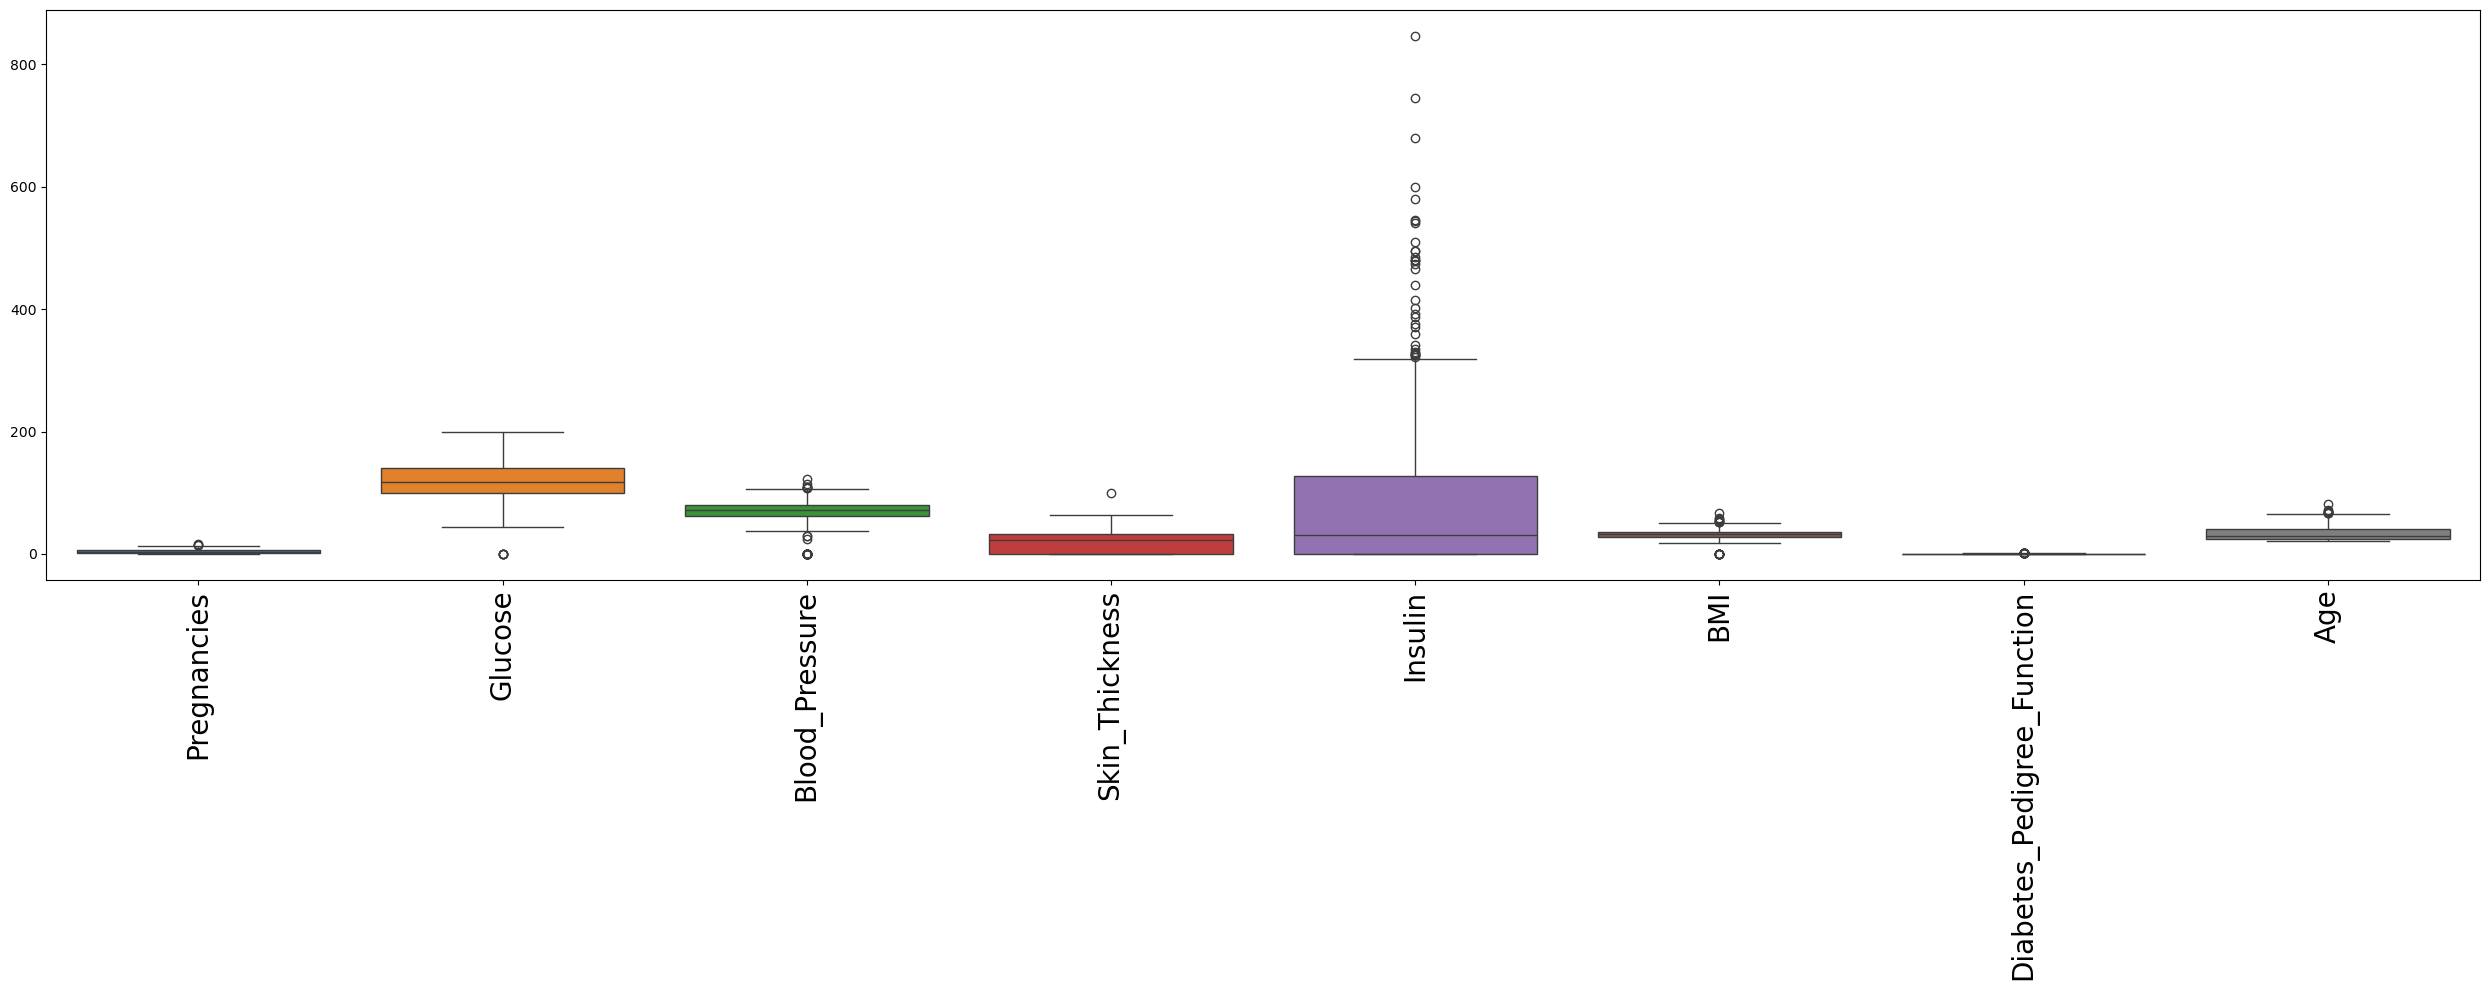

In [99]:
subset = out_df.iloc[:, :8]  
plt.figure(figsize=(25, 10))
sns.boxplot(data=subset)
plt.xticks(rotation=90, fontsize=20)
plt.tight_layout()
plt.show()

Processing column: Glucose


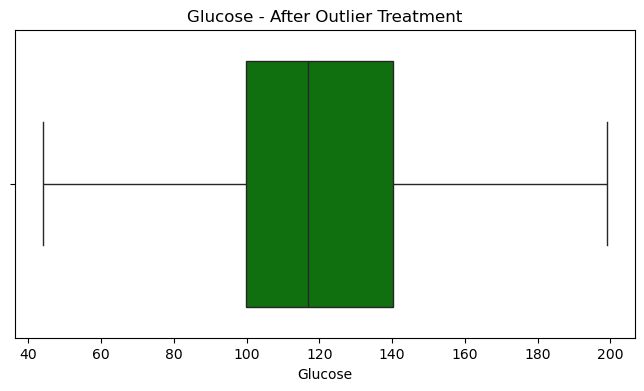

Processing column: Skin_Thickness


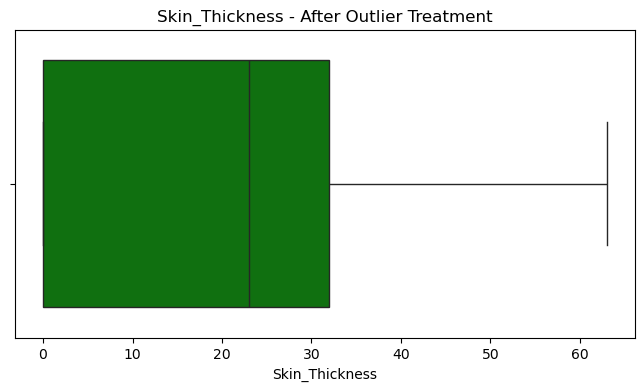

Processing column: Blood_Pressure


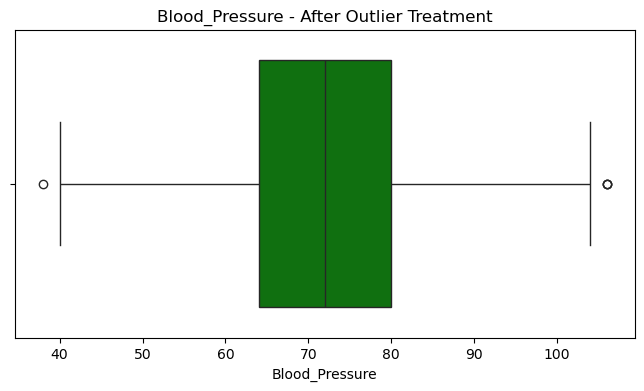

Processing column: Insulin


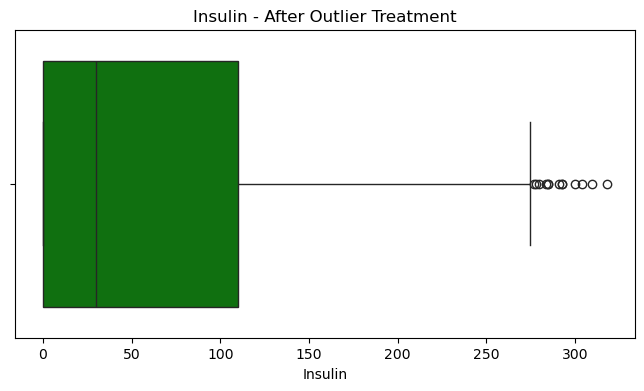

Processing column: BMI


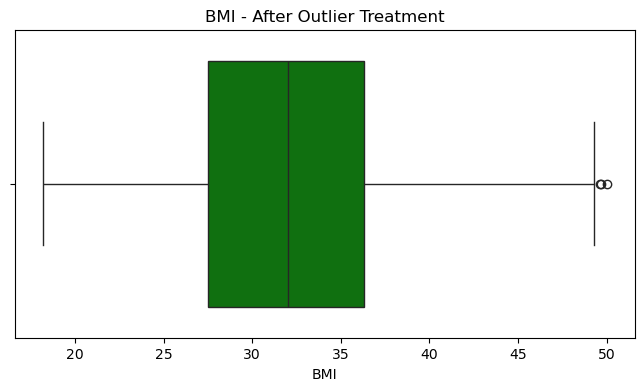

Processing column: Diabetes_Pedigree_Function


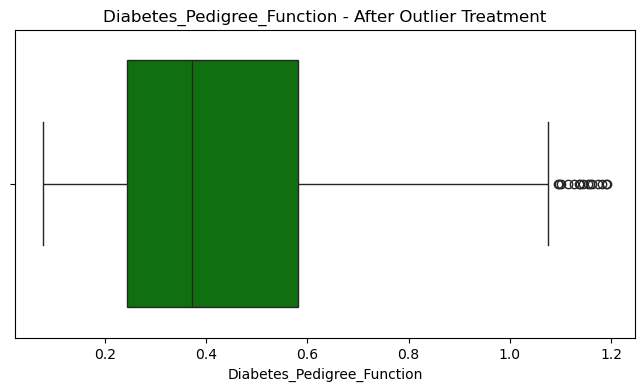

In [100]:
#treating outliers
def outlier_treatment(df):
    # Specified columns for outlier treatment
    specified_columns = ["Glucose", "Skin_Thickness", "Blood_Pressure", "Insulin", "BMI", "Diabetes_Pedigree_Function"]
    
    for column in specified_columns:
        print(f"Processing column: {column}")
        
        # Calculate IQR, lower and upper bounds
        Q1 = df[column].quantile(0.25)  
        Q3 = df[column].quantile(0.75)  
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with the median
        median_value = df[column].median()
        df[column] = df[column].apply(
            lambda x: median_value if x < lower_bound or x > upper_bound else x
        )

        # Box plot after treatment
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[column], color='green')
        plt.title(f"{column} - After Outlier Treatment")
        plt.show()
    
    return df

df_cleaned = outlier_treatment(df)

# __Exploratory Data Analysis (EDA)__

In [101]:
#Summary Statistics
df.describe()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.196615,20.437500,60.919271,32.198958,0.427667,33.240885,0.348958
std,3.369578,30.438286,11.146723,15.698554,77.635666,6.410558,0.245162,11.760232,0.476951
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.750000,32.000000,0.371750,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,110.000000,36.300000,0.582250,41.000000,1.000000
max,17.000000,199.000000,106.000000,63.000000,318.000000,50.000000,1.191000,81.000000,1.000000


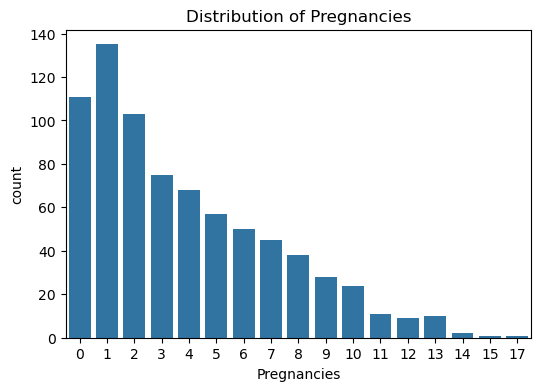

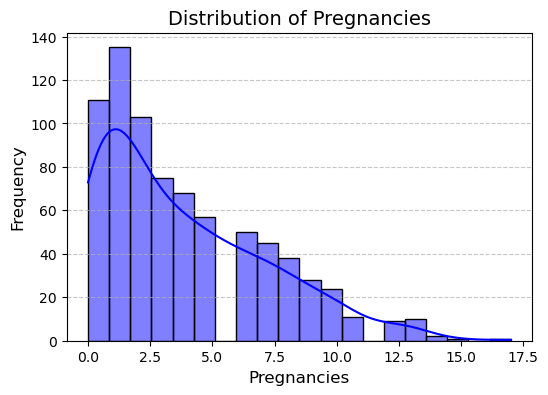

In [102]:
#Univariate Analysis for Numerical Features
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Pregnancies')
plt.title("Distribution of Pregnancies")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Pregnancies', bins=20, kde=True, color='blue')  
plt.title("Distribution of Pregnancies", fontsize=14)
plt.xlabel("Pregnancies", fontsize=12)  
plt.ylabel("Frequency", fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

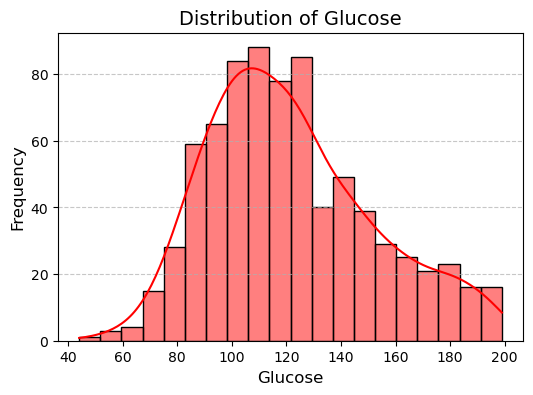

In [103]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Glucose', bins=20, kde=True, color='red')  
plt.title("Distribution of Glucose", fontsize=14)
plt.xlabel("Glucose", fontsize=12)  
plt.ylabel("Frequency", fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

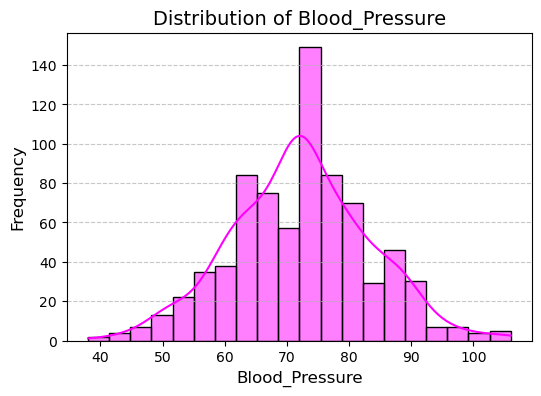

In [104]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Blood_Pressure', bins=20, kde=True, color='magenta')  
plt.title("Distribution of Blood_Pressure", fontsize=14)
plt.xlabel("Blood_Pressure", fontsize=12)  
plt.ylabel("Frequency", fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

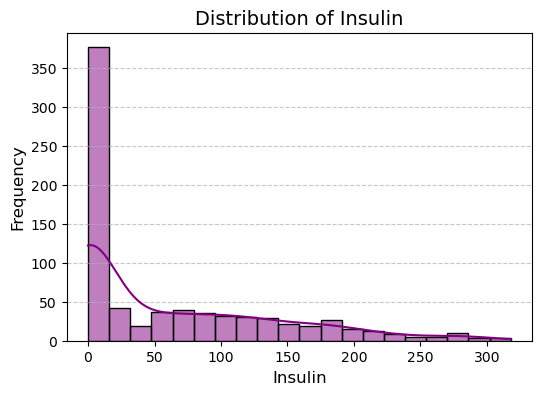

In [105]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Insulin', bins=20, kde=True, color='purple')  
plt.title("Distribution of Insulin", fontsize=14)
plt.xlabel("Insulin", fontsize=12)  
plt.ylabel("Frequency", fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

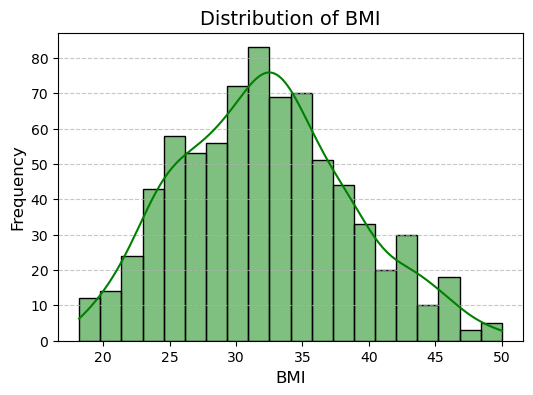

In [106]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='BMI', bins=20, kde=True, color='green')  
plt.title("Distribution of BMI", fontsize=14)
plt.xlabel("BMI", fontsize=12)  
plt.ylabel("Frequency", fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

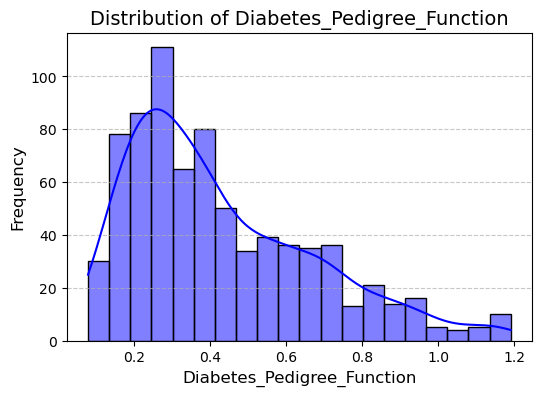

In [107]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Diabetes_Pedigree_Function', bins=20, kde=True, color='blue')  
plt.title("Distribution of Diabetes_Pedigree_Function", fontsize=14)
plt.xlabel("Diabetes_Pedigree_Function", fontsize=12)  
plt.ylabel("Frequency", fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

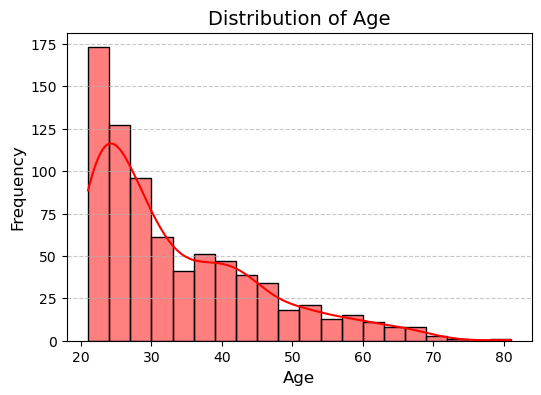

In [108]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='red')  
plt.title("Distribution of Age", fontsize=14)
plt.xlabel("Age", fontsize=12)  
plt.ylabel("Frequency", fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

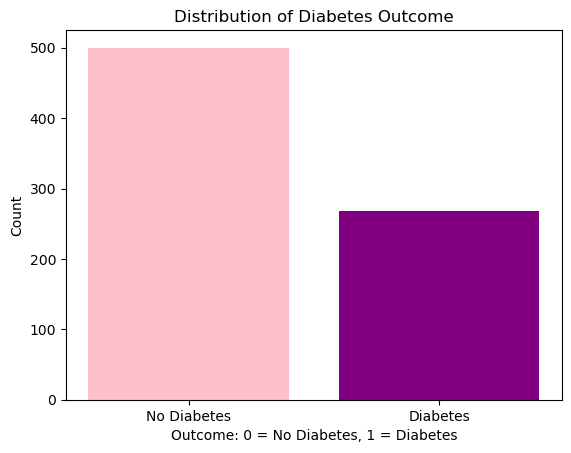

In [109]:
#Univariate Analysis for Categorical Features
outcome_counts = df['Outcome'].value_counts()

plt.bar(outcome_counts.index, outcome_counts.values, color=['pink', 'purple'])
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome: 0 = No Diabetes, 1 = Diabetes')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.ylabel('Count')
plt.show()

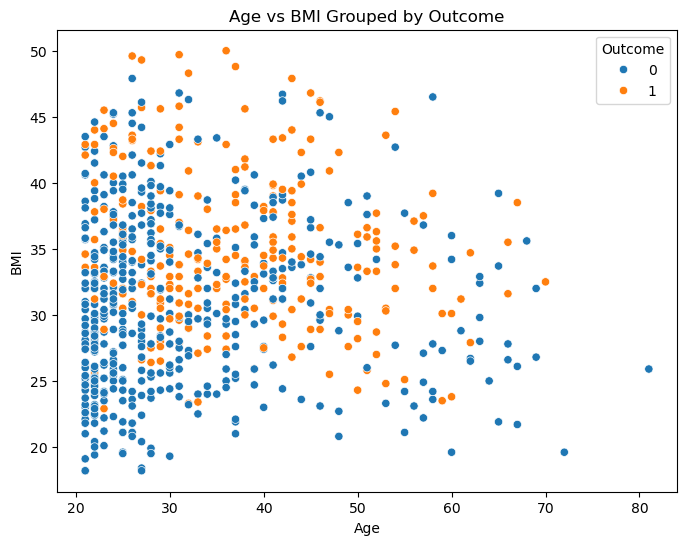

In [110]:
#Bivariate Analysis: Relationships Between Numerical Features Age vs. BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=df)
plt.title("Age vs BMI Grouped by Outcome")
plt.show()

C:\Users\TestFix123\AppData\Local\Temp\ipykernel_19852\3246269155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette=[colors[i]])
C:\Users\TestFix123\AppData\Local\Temp\ipykernel_19852\3246269155.py:6: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Outcome', y=col, data=df, palette=[colors[i]])


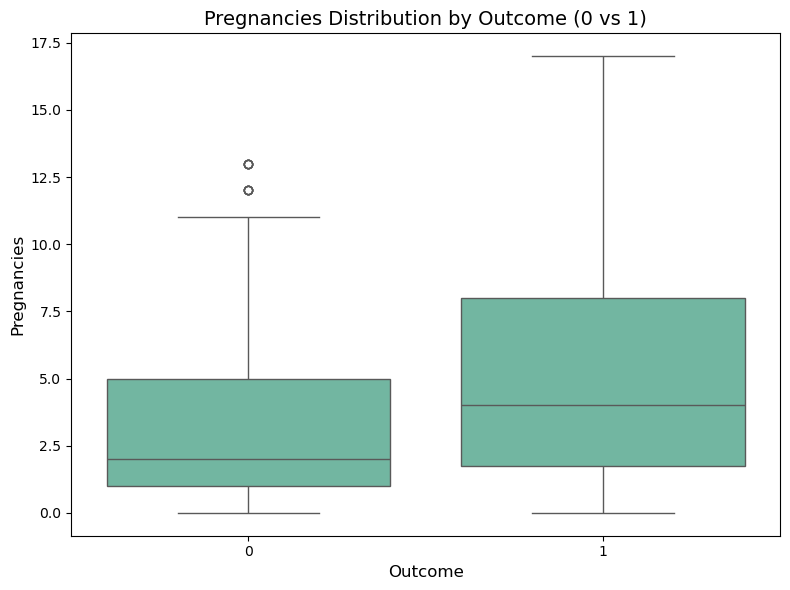

C:\Users\TestFix123\AppData\Local\Temp\ipykernel_19852\3246269155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette=[colors[i]])
C:\Users\TestFix123\AppData\Local\Temp\ipykernel_19852\3246269155.py:6: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Outcome', y=col, data=df, palette=[colors[i]])


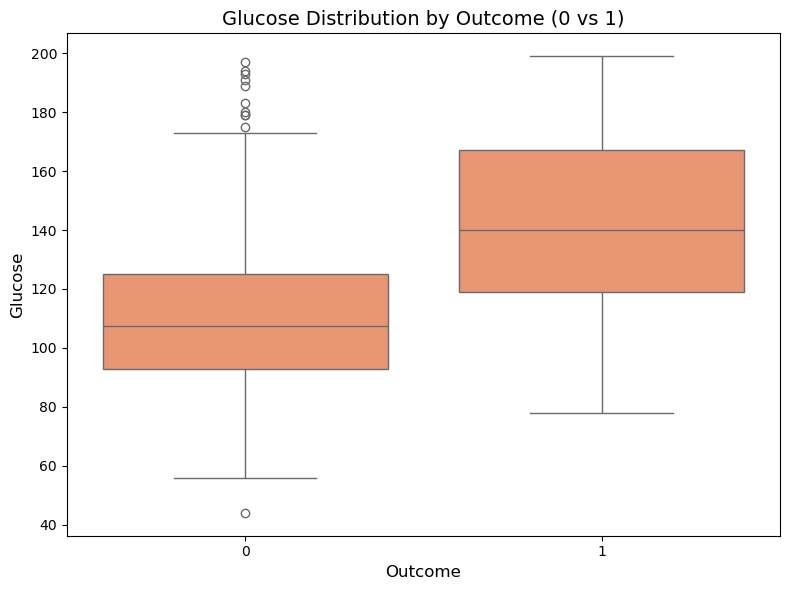

C:\Users\TestFix123\AppData\Local\Temp\ipykernel_19852\3246269155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette=[colors[i]])
C:\Users\TestFix123\AppData\Local\Temp\ipykernel_19852\3246269155.py:6: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Outcome', y=col, data=df, palette=[colors[i]])


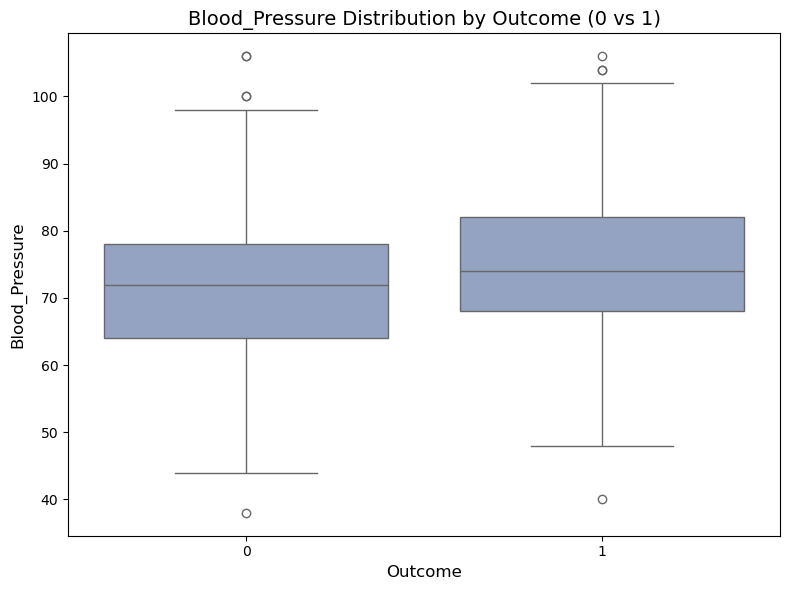

C:\Users\TestFix123\AppData\Local\Temp\ipykernel_19852\3246269155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette=[colors[i]])
C:\Users\TestFix123\AppData\Local\Temp\ipykernel_19852\3246269155.py:6: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Outcome', y=col, data=df, palette=[colors[i]])


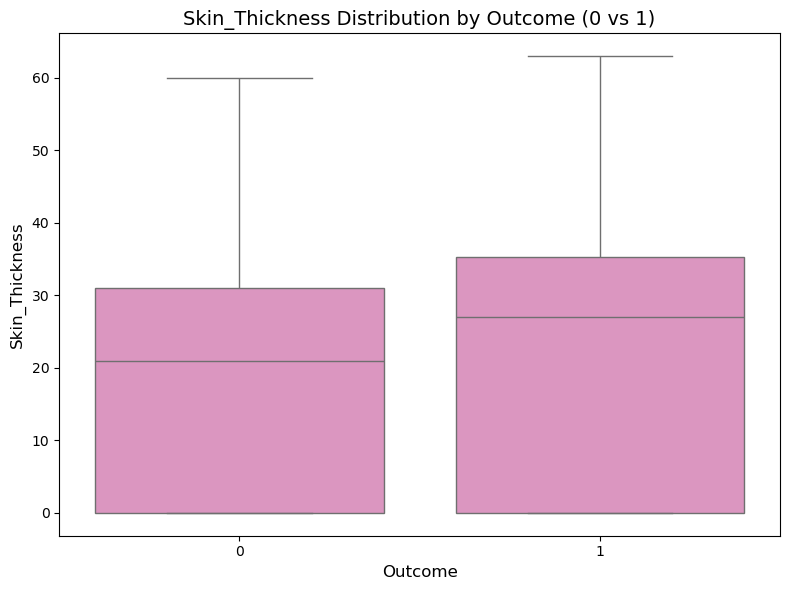

C:\Users\TestFix123\AppData\Local\Temp\ipykernel_19852\3246269155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette=[colors[i]])
C:\Users\TestFix123\AppData\Local\Temp\ipykernel_19852\3246269155.py:6: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Outcome', y=col, data=df, palette=[colors[i]])


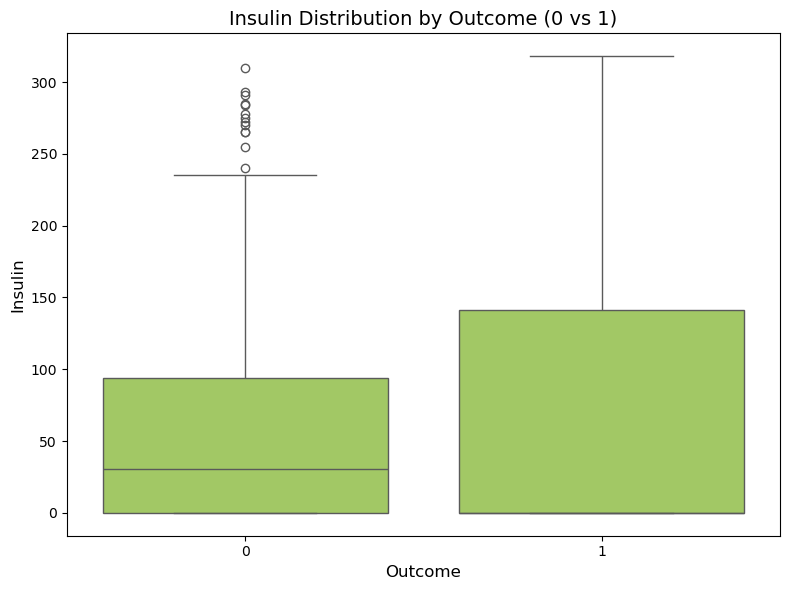

C:\Users\TestFix123\AppData\Local\Temp\ipykernel_19852\3246269155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette=[colors[i]])
C:\Users\TestFix123\AppData\Local\Temp\ipykernel_19852\3246269155.py:6: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Outcome', y=col, data=df, palette=[colors[i]])


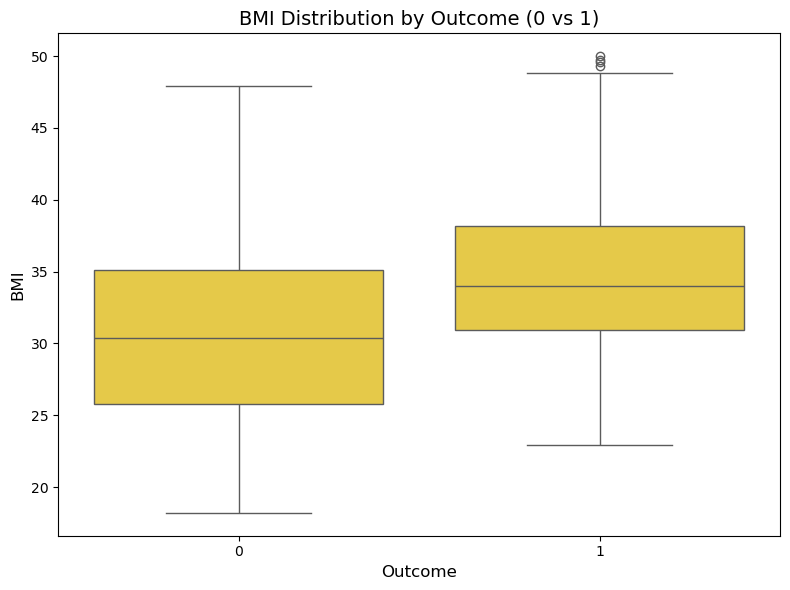

C:\Users\TestFix123\AppData\Local\Temp\ipykernel_19852\3246269155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette=[colors[i]])
C:\Users\TestFix123\AppData\Local\Temp\ipykernel_19852\3246269155.py:6: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Outcome', y=col, data=df, palette=[colors[i]])


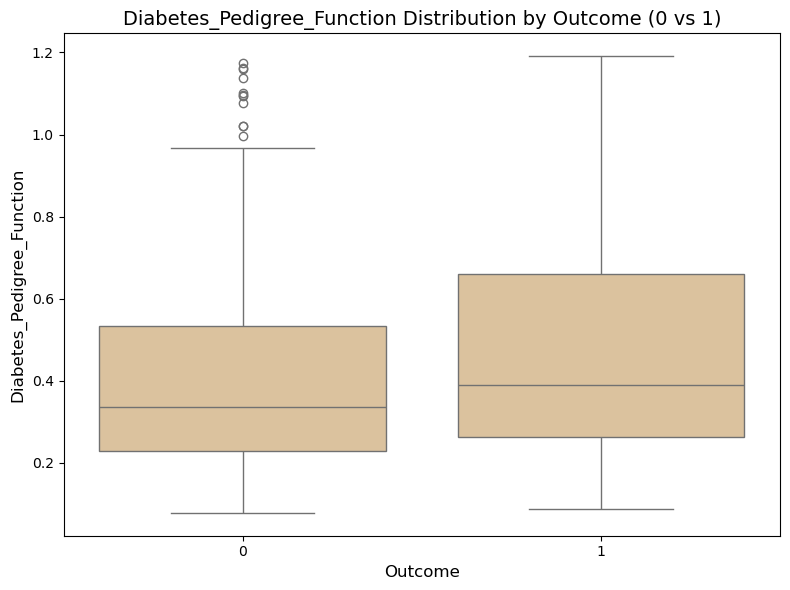

C:\Users\TestFix123\AppData\Local\Temp\ipykernel_19852\3246269155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y=col, data=df, palette=[colors[i]])
C:\Users\TestFix123\AppData\Local\Temp\ipykernel_19852\3246269155.py:6: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Outcome', y=col, data=df, palette=[colors[i]])


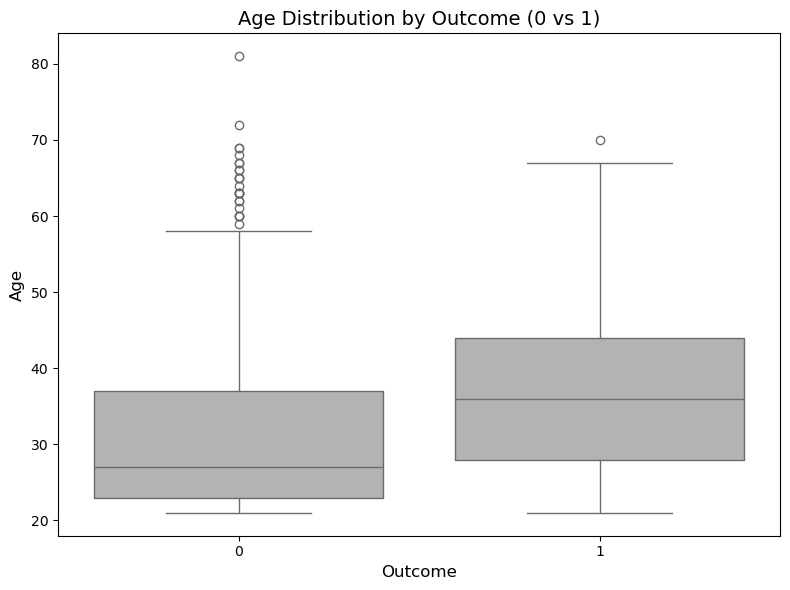

In [111]:
#Bivariate Analysis: Outcome vs. Features
numerical_columns= ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age']
colors = sns.color_palette("Set2", len(numerical_columns))
for i, col in enumerate(numerical_columns):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y=col, data=df, palette=[colors[i]])  
    plt.title(f"{col} Distribution by Outcome (0 vs 1)", fontsize=14)
    plt.xlabel("Outcome", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

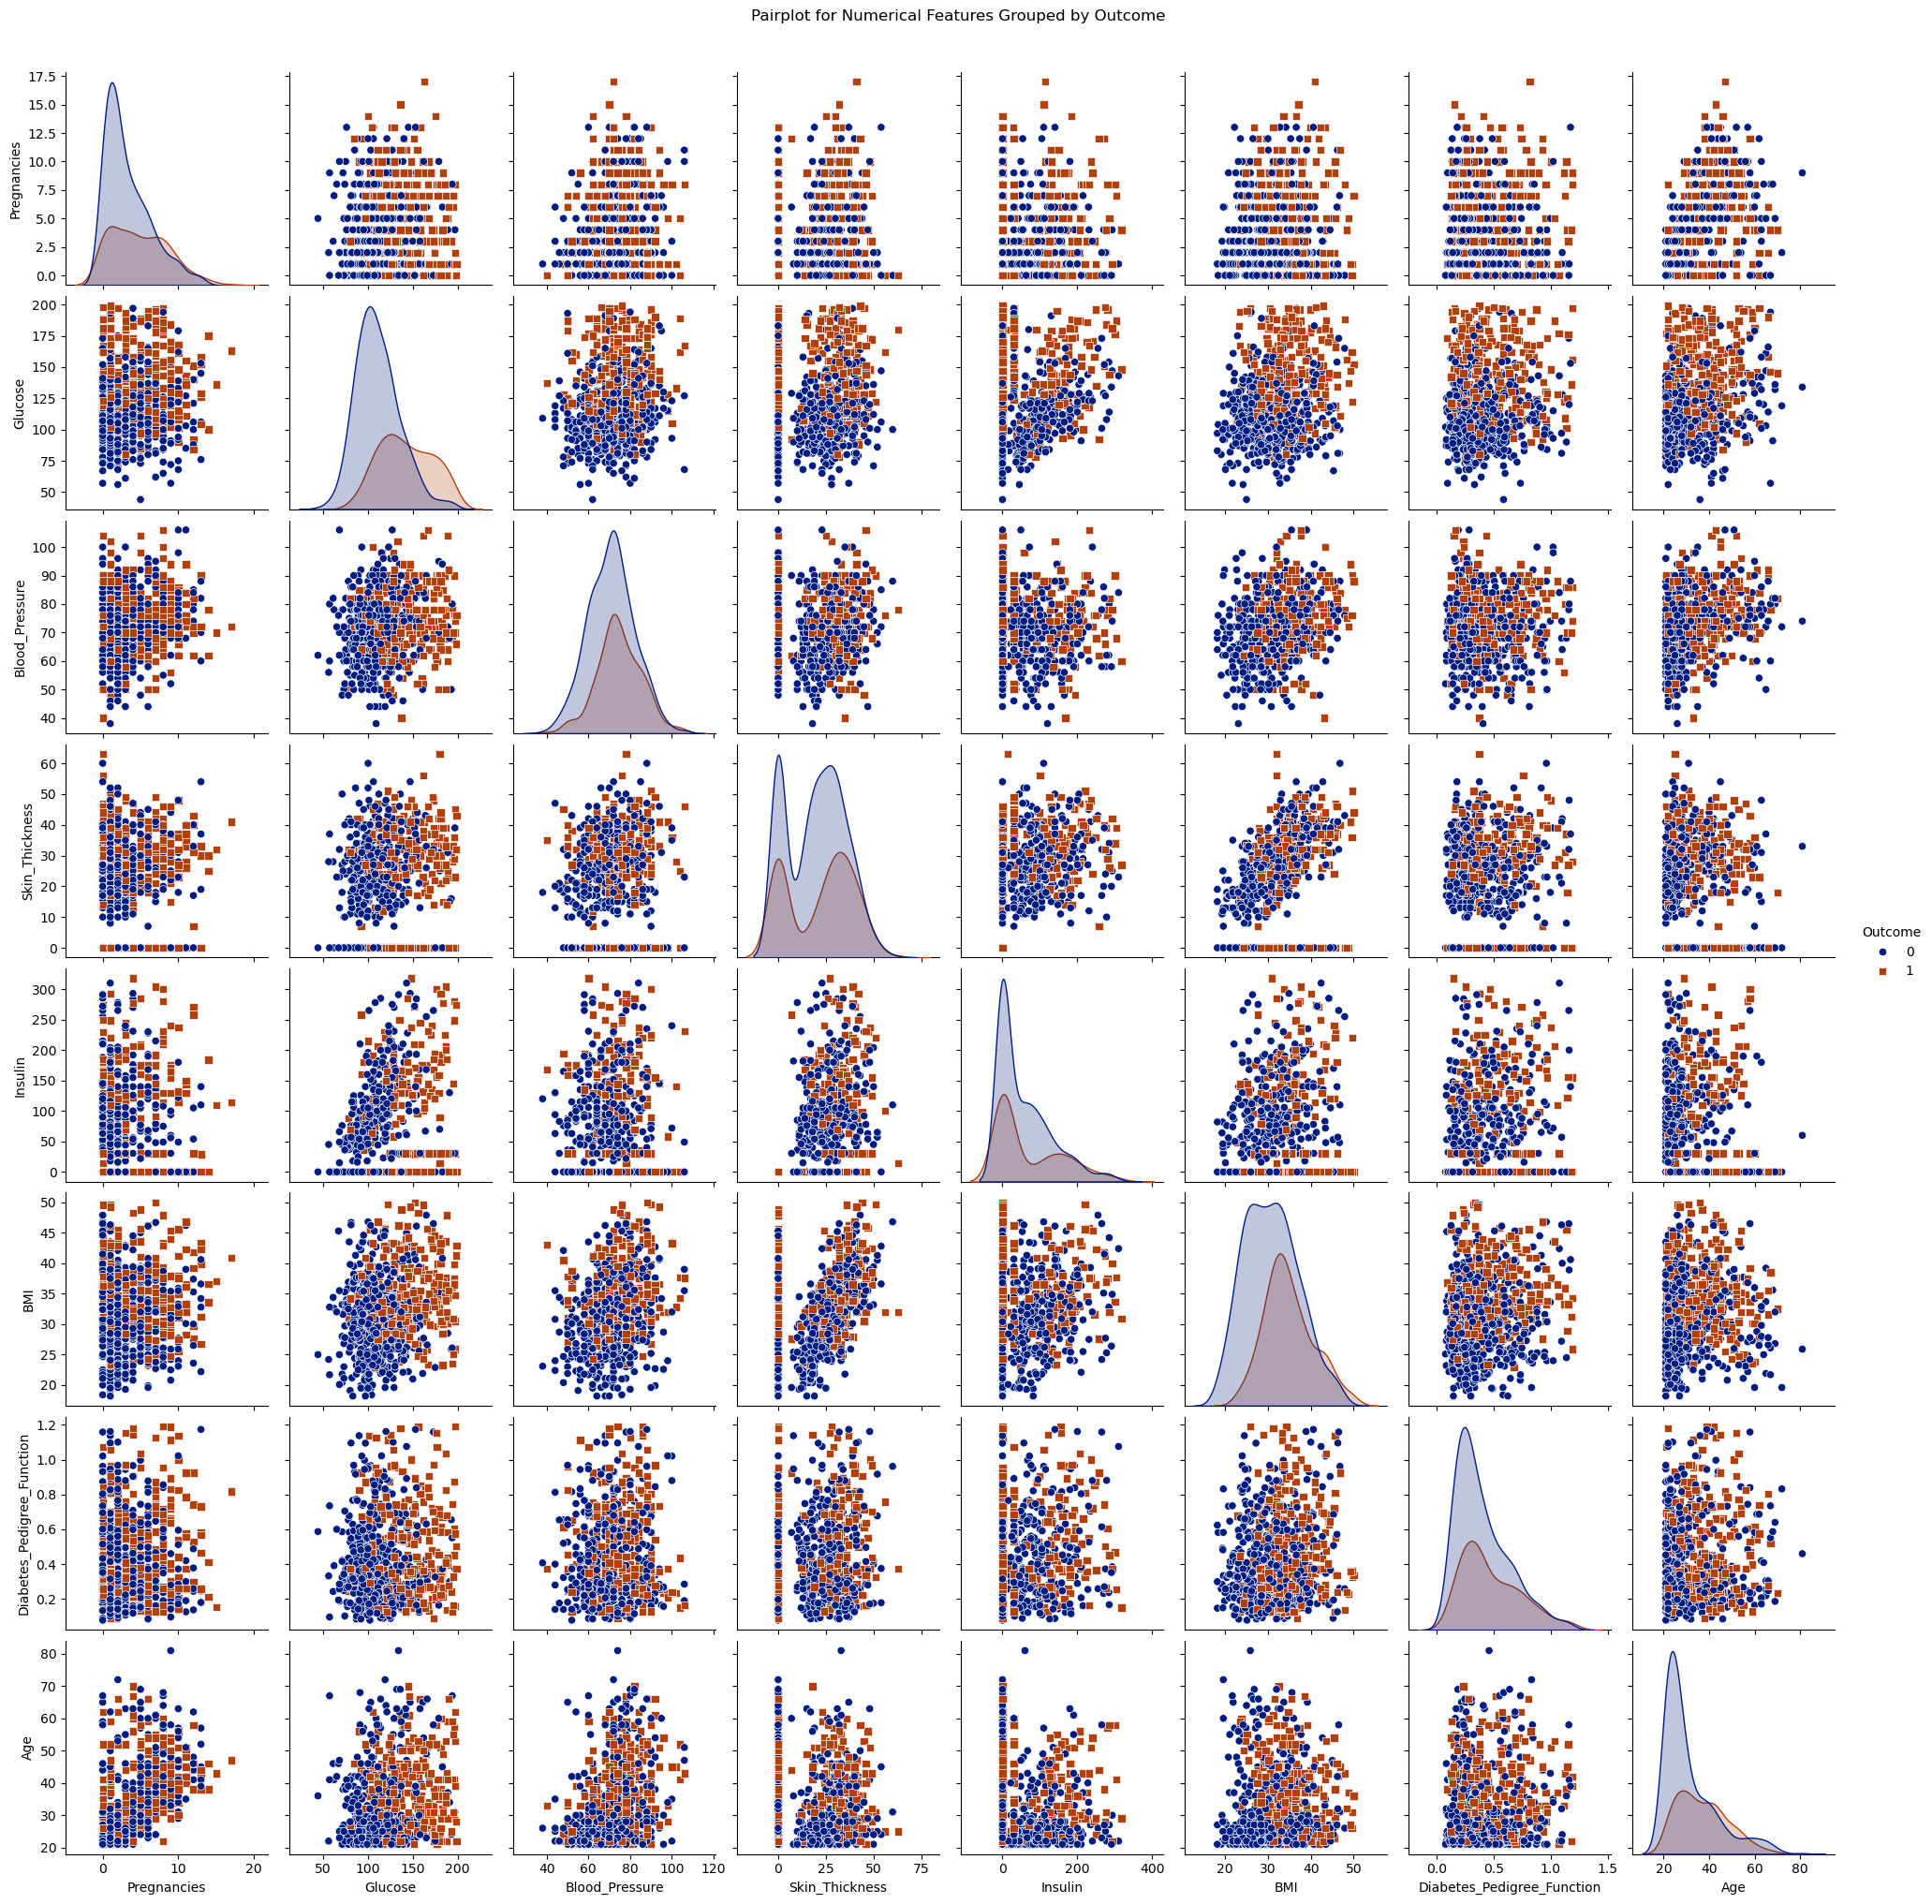

In [112]:
# Pairplot to show relationships between all the features, grouped by Outcome
sns.pairplot(df, vars=numerical_columns, hue="Outcome", markers=["o", "s"], palette='dark')
plt.suptitle("Pairplot for Numerical Features Grouped by Outcome", y=1.02)
plt.show()

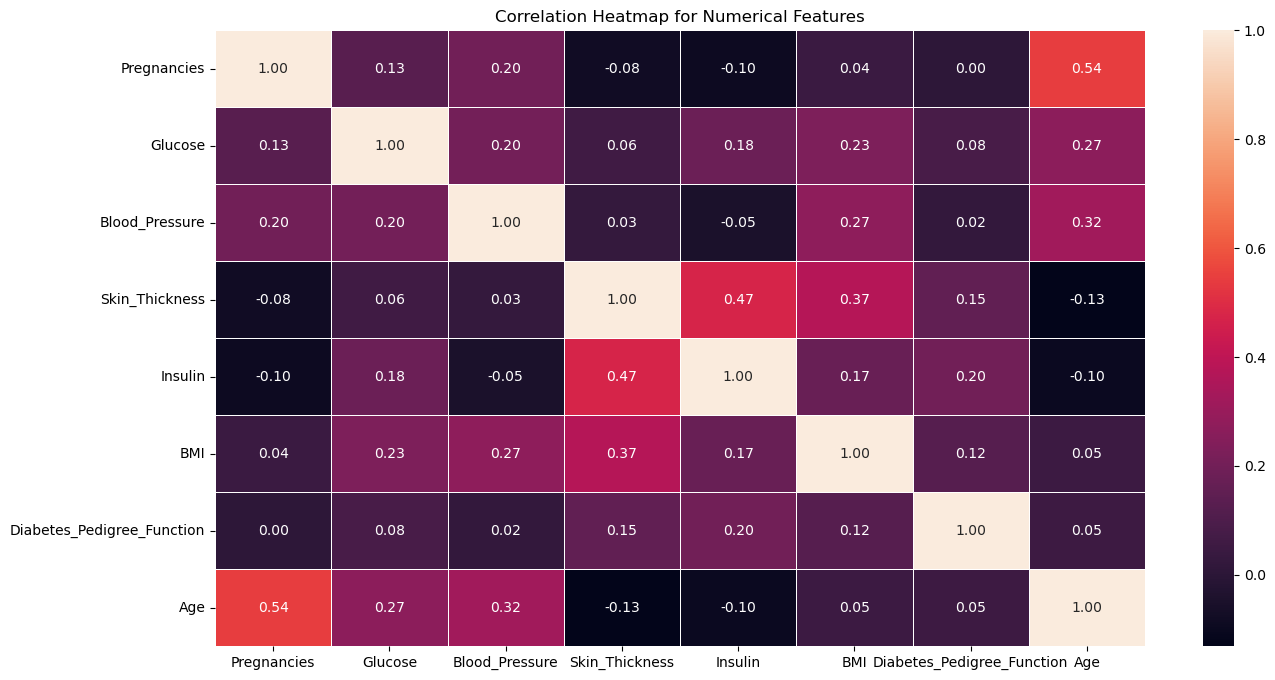

In [113]:
#Correlation Analysis
corr = df[numerical_columns].corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features")
plt.show()

# __Model Building__

## _Model Training_

In [114]:
X = df.drop('Outcome',axis = 1)
y = df[['Outcome']]

In [115]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [116]:
y_test.head()

,Outcome
661,1
122,0
113,0
14,1
529,0


In [117]:
y_train.head()

,Outcome
762,0
127,0
564,0
375,1
663,1


In [118]:
X_train.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
762,9,89.0,62.0,0.0,0.0,22.5,0.142,33
127,1,118.0,58.0,36.0,94.0,33.3,0.261,23
564,0,91.0,80.0,0.0,0.0,32.4,0.601,27
375,12,140.0,82.0,43.0,30.5,39.2,0.528,58
663,9,145.0,80.0,46.0,130.0,37.9,0.637,40


In [119]:
X_test.head()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age
661,1,199.0,76.0,43.0,0.0,42.9,0.3725,22
122,2,107.0,74.0,30.0,100.0,33.6,0.4040,23
113,4,76.0,62.0,0.0,0.0,34.0,0.3910,25
14,5,166.0,72.0,19.0,175.0,25.8,0.5870,51
529,0,111.0,65.0,0.0,0.0,24.6,0.6600,31


### Logistic Regression

In [120]:
#Logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
# Train the model
model.fit(X_train, y_train)

C:\Users\TestFix123\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\TestFix123\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [121]:
# Make predictions on the test data
y_pred_l = model.predict(X_test)
print(y_pred_l)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0]


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    float64
 2   Blood_Pressure              768 non-null    float64
 3   Skin_Thickness              768 non-null    float64
 4   Insulin                     768 non-null    float64
 5   BMI                         768 non-null    float64
 6   Diabetes_Pedigree_Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [123]:
import statsmodels.api as sm
logm1=sm.GLM(y_train.astype(float),(sm.add_constant(X_train.astype(float))),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  576
Model:                            GLM   Df Residuals:                      567
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -275.26
Date:                Wed, 16 Jul 2025   Deviance:                       550.51
Time:                        12:34:01   Pearson chi2:                     551.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2941
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -8.8215      0.956     -9.232      0.000     -10.694      -6.949
Pregnancies                    0.0866      0.036      2.413      0.016       0.016       0.157
Glucose                        0.0367      0.004      8.668      0.000       0.028       0.045
Blood_Pressure                -0.0118      0.010     -1.143      0.253      -0.032       0.008
Skin_Thickness                 0.0024      0.008      0.306      0.759      -0.013       0.018
Insulin                       -0.0003      0.002     -0.227      0.820      -0.003       0.003
BMI                            0.0912      0.019      4.740      0.000       0.054       0.129
Diabetes_Pedigree_Function     1.0856      0.432      2.511      0.012       0.238       1.933
Age                            0.0184      0.011      1.660      0.097      -0.003       0.040
==============================================================================================
"""

Confusion Metrics:
 [[118  12]
 [ 27  35]]




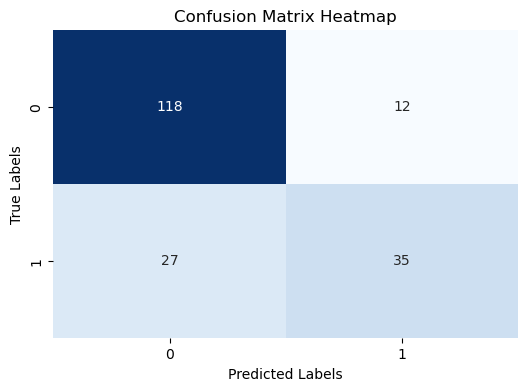


 Accuracy: 79.6875%


In [124]:
#Checking accuracy and metrics for LOR
from sklearn import metrics
#Confusion Metrics
confusion_l=metrics.confusion_matrix(y_test,y_pred_l)
print("Confusion Metrics:\n",confusion_l)
print("\n")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_l, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#Acurracy of the model
print(f"\n Accuracy: {metrics.accuracy_score(y_test,y_pred_l)*100}%")

In [125]:
#Metric beyond Confusion for LOR
from sklearn.metrics import classification_report
TP=confusion_l[1,1]
TN=confusion_l[0,0]
FP=confusion_l[0,1]
FN=confusion_l[1,0]

print("Recall/Sensitivity of LOR: ",TP/float(TP+FN))
print("Specificity of LOR: ",TN/float(TN+FP))
print("Precision of LOR: ", TP/float(TP+FP))
print("\n")
classification_rep = classification_report(y_test, y_pred_l)
print("Classification Report of LOR:\n", classification_rep)

Recall/Sensitivity of LOR:  0.5645161290322581
Specificity of LOR:  0.9076923076923077
Precision of LOR:  0.7446808510638298


Classification Report of LOR:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       130
           1       0.74      0.56      0.64        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



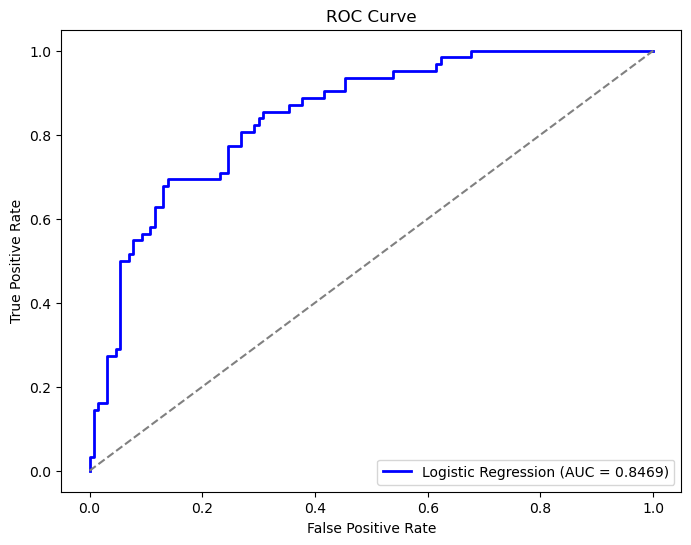

In [126]:
# ROC Curve for LOR
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## DECISION TREE

In [127]:
# now Decision Tree model building
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#Model building
#clf=DecisionTreeClassifier()
clf=DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf=clf.fit(X_train,y_train)

In [128]:
#Evaluate model
from sklearn import metrics
y_pred_dt=clf.predict(X_test)
print(y_pred_dt)

[1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 1 0 1 0 0 0]


Confusion Metrics:
 [[112  18]
 [ 30  32]]




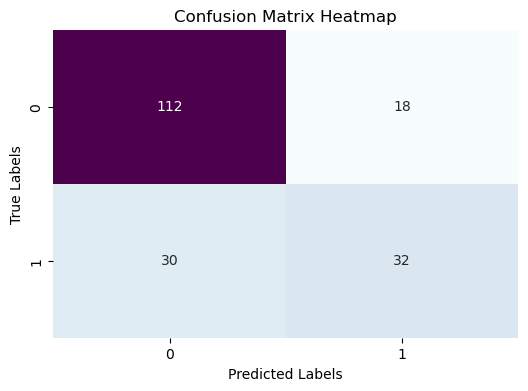


 Accuracy: 75.0%


In [129]:
#Checking accuracy and metrics
from sklearn import metrics
#Confusion Metrics
confusion_dt=metrics.confusion_matrix(y_test,y_pred_dt)
print("Confusion Metrics:\n",confusion_dt)
print("\n")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_dt, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#Acurracy of the model
print(f"\n Accuracy: {metrics.accuracy_score(y_test,y_pred_dt)*100}%")

In [130]:
#Metric beyond Confusion
from sklearn.metrics import classification_report
TP1=confusion_dt[1,1]
TN1=confusion_dt[0,0]
FP1=confusion_dt[0,1]
FN1=confusion_dt[1,0]

print("Recall/Sensitivity of DT: ",TP1/float(TP1+FN1))
print("Specificity of DT: ",TN1/float(TN1+FP1))
print("Precision of DT: ", TP1/float(TP1+FP1))
print("\n")
classification_rep_dt = classification_report(y_test, y_pred_dt)
print("Classification Report of DT:\n", classification_rep_dt)

Recall/Sensitivity of DT:  0.5161290322580645
Specificity of DT:  0.8615384615384616
Precision of DT:  0.64


Classification Report of DT:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       130
           1       0.64      0.52      0.57        62

    accuracy                           0.75       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.74      0.75      0.74       192



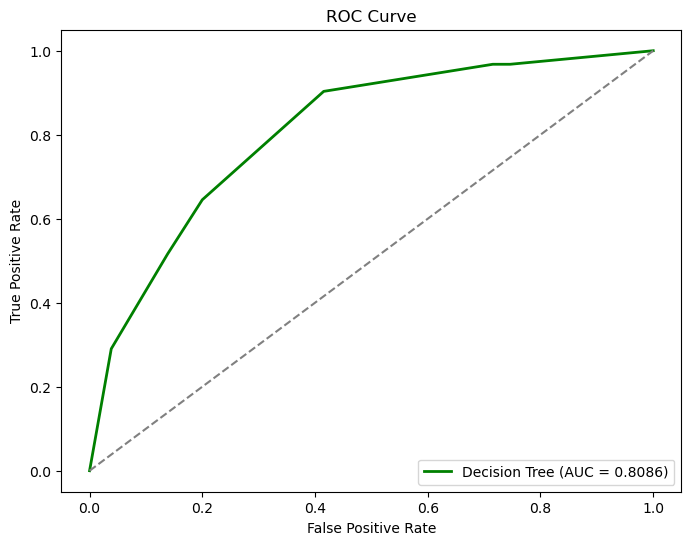

In [131]:
#ROC Curve for Decision Tree
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### _"COMPARISION"_

__ACCURACY: DECISION TREE has acurracy of 75.0% whereas 
          LOGISTIC REGRESSION MODEL has accuracy of 79.68% (approx.80%)__
          
__RECALL:DECISION TREE has recall rate of 51.61% whereas 
       LOGISTIC REGRESSION MODEL has recall rate of 56.45%__
       
__PRECISION:DECISION TREE has precision of 64% whereas 
          LOGISTIC REGRESSION MODEL has precision of 74.46%__

### ***In all ascpect LOGISTIC REGRESSION is BETTER than DECISION TREE***

_Logistic Regression_ has __higher acurracy, higher precision, higher recall rate__ <br>
***Prefer Logistic Regression Over Decision Tree***